In [ ]:
import pandas as pd
#datasets shapes
df1=pd.read_csv('gene_expression_all_patients.csv')
df2=pd.read_csv('gene_expression_aml_patients.csv')
df3=pd.read_csv('gene_expression_cll_patients.csv')
print(df1.shape)
print(df2.shape)
print(df3.shape)


(45101, 42)
(54675, 124)
(54675, 122)


In [ ]:
# Check how many genes overlap
common_genes = set(df1.iloc[:, 0]) & set(df2.iloc[:, 0]) & set(df3.iloc[:, 0])
print(f"Number of common genes across all datasets: {len(common_genes)}")


Number of common genes across all datasets: 45


In [ ]:
print(f"Genes unique to ALL: {len(set(df1.iloc[:, 0]) - set(df2.iloc[:, 0]))}")
print(f"Genes unique to AML: {len(set(df2.iloc[:, 0]) - set(df1.iloc[:, 0]))}")
print(f"Genes unique to CLL: {len(set(df3.iloc[:, 0]) - set(df1.iloc[:, 0]))}")


Genes unique to ALL: 45056
Genes unique to AML: 54630
Genes unique to CLL: 54630


In [ ]:
# Extract the 45 common genes from all datasets
common_gene_ids = list(common_genes)  # Assuming 'common_genes' contains the common gene IDs

df1_common = df1[df1.iloc[:, 0].isin(common_gene_ids)]
df2_common = df2[df2.iloc[:, 0].isin(common_gene_ids)]
df3_common = df3[df3.iloc[:, 0].isin(common_gene_ids)]


In [ ]:
# Transposing datasets (keeping gene probe IDs as column names)
df1_transposed = df1_common.set_index(df1_common.columns[0]).T
df2_transposed = df2_common.set_index(df2_common.columns[0]).T
df3_transposed = df3_common.set_index(df3_common.columns[0]).T


In [ ]:
df1_transposed['label'] = 0  # ALL
df2_transposed['label'] = 1  # AML
df3_transposed['label'] = 1  # CLL


In [ ]:
df_final = pd.concat([df1_transposed, df2_transposed, df3_transposed])

# Shuffle dataset
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
df_final.head()

Unnamed: 0,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-CreX-3_at,AFFX-CreX-5_at,AFFX-DapX-3_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,label
0,12.310240,12.163259,12.714779,12.570417,13.004384,14.128214,13.494832,14.868831,14.610297,5.370143,...,14.235938,15.061009,14.908949,4.934655,5.520856,4.720974,4.183408,4.632217,6.164862,0
1,7.807710,7.864454,8.221288,9.650551,9.422084,11.889674,10.396674,13.148148,12.874322,9.133651,...,11.666976,13.671055,13.454041,6.961929,3.935791,4.506204,2.896931,3.202657,3.082042,1
2,2.259076,2.862399,2.900994,2.966930,3.184495,6.187998,2.166829,3.210989,2.211779,2.816922,...,2.676848,2.722634,2.754187,4.866051,3.281376,4.051432,2.792852,3.725230,2.831932,1
3,7.654381,7.686378,8.075024,9.463617,9.208011,11.908037,10.272270,13.032540,12.665416,8.163725,...,11.699638,13.573783,13.423575,6.208046,3.735105,4.245390,3.009490,3.144262,3.103781,1
4,6.899194,7.594372,7.479661,8.892784,8.213838,11.249870,9.844591,13.020581,12.634494,9.053994,...,11.463367,13.250666,13.398768,7.128832,5.336592,6.343756,2.495024,3.651115,2.507508,1


In [ ]:
df_final.shape

(285, 46)

label
1    244
0     41
Name: count, dtype: int64


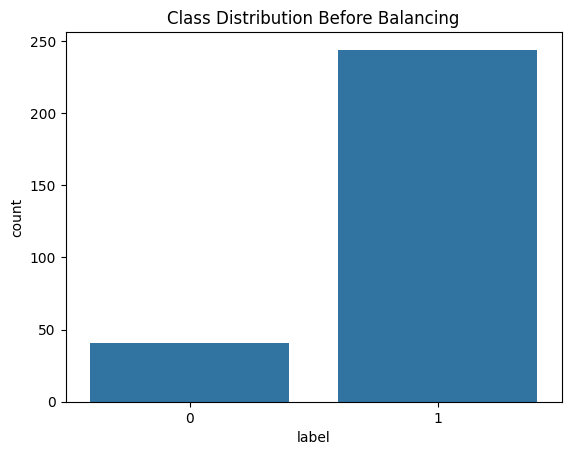

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of samples in each class
print(df_final['label'].value_counts())

# Visualize class distribution
sns.countplot(x=df_final['label'])
plt.title("Class Distribution Before Balancing")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting features and target
X = df_final.drop(columns=['label'])  # Gene expressions
y = df_final['label']  # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_resampled.value_counts().to_dict())


Before SMOTE: {1: 195, 0: 33}
After SMOTE: {1: 195, 0: 195}


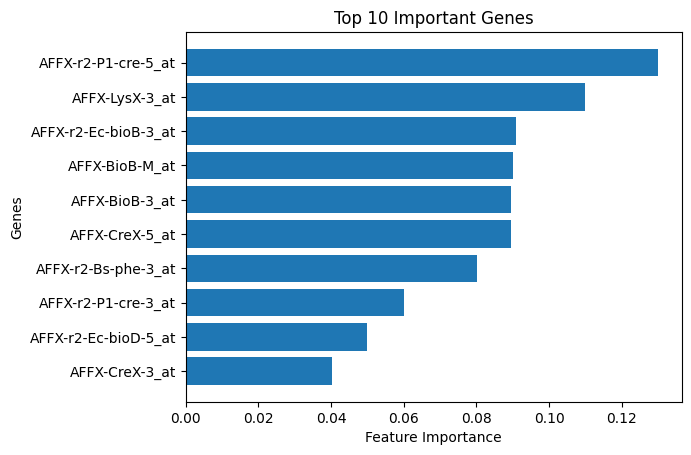

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_
top_features = np.argsort(feature_importances)[-10:]  # Top 10 genes

plt.barh(range(len(top_features)), feature_importances[top_features])
plt.yticks(range(len(top_features)), X.columns[top_features])
plt.xlabel("Feature Importance")
plt.ylabel("Genes")
plt.title("Top 10 Important Genes")
plt.show()


<ipython-input-16-e07003acac24>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 0], label="ALL", shade=True)
<ipython-input-16-e07003acac24>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 1], label="AML/CLL", shade=True)


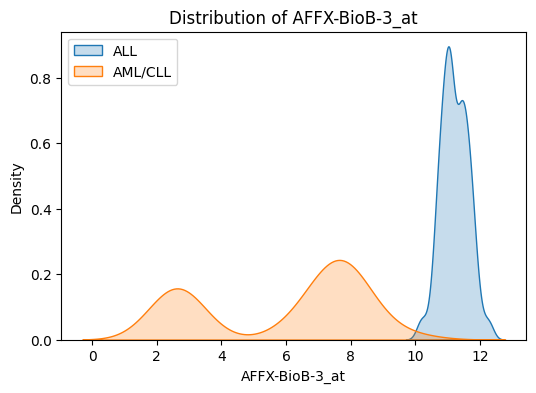

<ipython-input-16-e07003acac24>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 0], label="ALL", shade=True)
<ipython-input-16-e07003acac24>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 1], label="AML/CLL", shade=True)


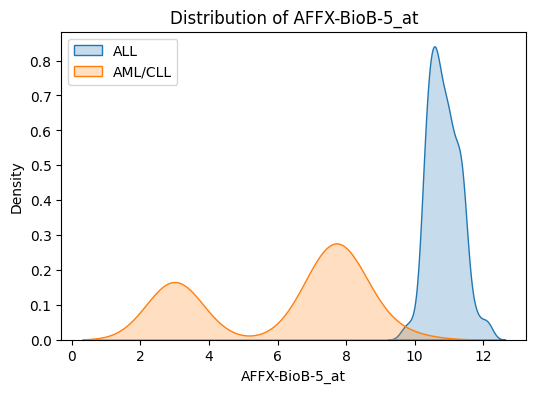

<ipython-input-16-e07003acac24>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 0], label="ALL", shade=True)
<ipython-input-16-e07003acac24>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 1], label="AML/CLL", shade=True)


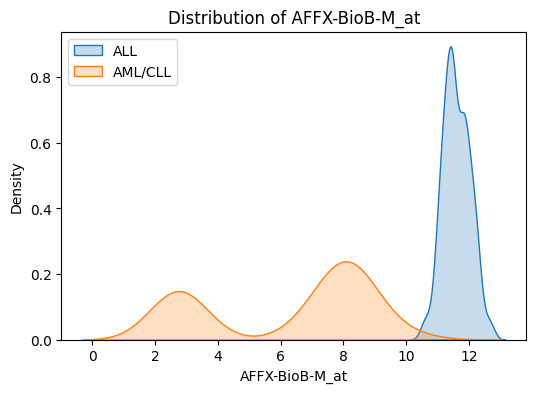

<ipython-input-16-e07003acac24>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 0], label="ALL", shade=True)
<ipython-input-16-e07003acac24>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 1], label="AML/CLL", shade=True)


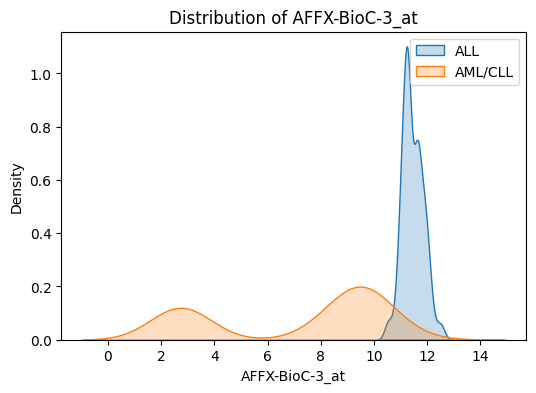

<ipython-input-16-e07003acac24>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 0], label="ALL", shade=True)
<ipython-input-16-e07003acac24>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_resampled[gene][y_train_resampled == 1], label="AML/CLL", shade=True)


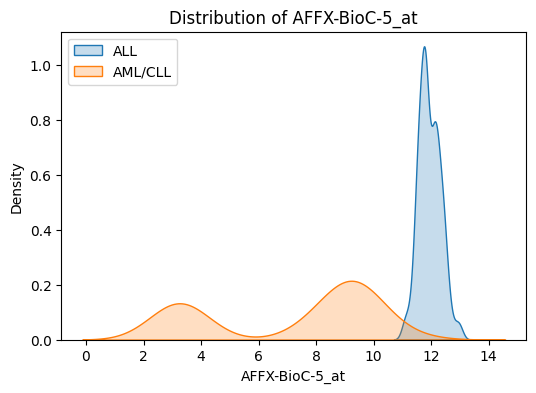

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose some random genes
genes_to_plot = X_train_resampled.columns[:5]  # First 5 genes

for gene in genes_to_plot:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(X_train_resampled[gene][y_train_resampled == 0], label="ALL", shade=True)
    sns.kdeplot(X_train_resampled[gene][y_train_resampled == 1], label="AML/CLL", shade=True)
    plt.title(f"Distribution of {gene}")
    plt.legend()
    plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold (adjust as needed)
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_train)

print(f"Number of features selected: {X_selected.shape[1]}")


Number of features selected: 45


Number of common genes: 45
Unique genes in ALL dataset: 45056
Unique genes in AML dataset: 54630
Unique genes in CLL dataset: 54630
Number of unique genes added: 30
Total genes selected for modeling: 75
Final dataset shape before feature selection: (285, 66)
Final number of genes after feature selection: 51

Class distribution before SMOTE:
label
1    195
0     33
Name: count, dtype: int64

Class distribution after SMOTE:
label
1    195
0    195
Name: count, dtype: int64

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        49

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00   

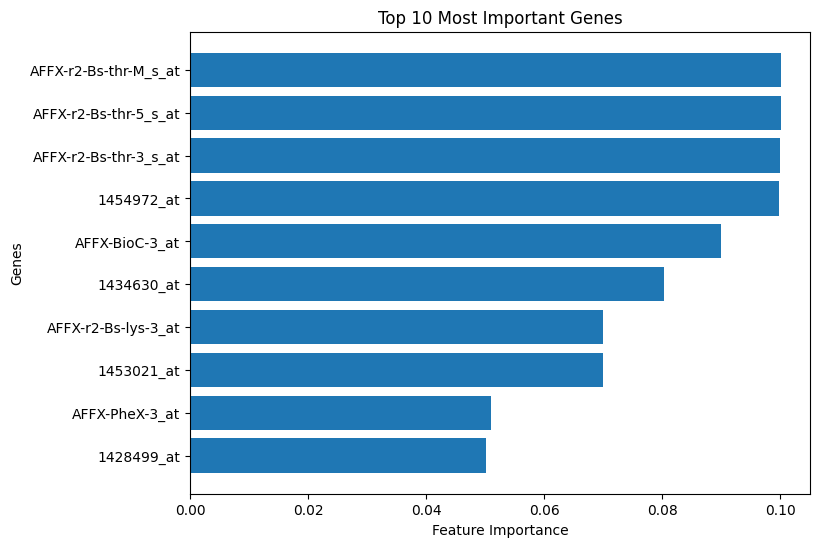

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# =============================
# 🔹 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# =============================
# 🔹 2. Identify Common & Unique Genes
# =============================
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Print gene distribution
print(f"Number of common genes: {len(common_genes)}")
print(f"Unique genes in ALL dataset: {len(unique_all)}")
print(f"Unique genes in AML dataset: {len(unique_aml)}")
print(f"Unique genes in CLL dataset: {len(unique_cll)}")

# Select a subset of unique genes (Top 10 from each group)
selected_unique_genes = list(unique_all)[:10] + list(unique_aml)[:10] + list(unique_cll)[:10]
selected_genes = list(common_genes) + selected_unique_genes

print(f"Number of unique genes added: {len(selected_unique_genes)}")
print(f"Total genes selected for modeling: {len(selected_genes)}")

# =============================
# 🔹 3. Filter & Transpose Data
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# =============================
# 🔹 4. Combine Data & Handle Missing Values
# =============================
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])
print(f"Final dataset shape before feature selection: {df_combined.shape}")

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X = df_combined.drop(columns=['label'])
X_imputed = imputer.fit_transform(X)
y = df_combined['label']

# =============================
# 🔹 5. Feature Selection (Variance Threshold)
# =============================
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_imputed)

print(f"Final number of genes after feature selection: {X_selected.shape[1]}")

# =============================
# 🔹 6. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Print class distribution before SMOTE
print("\nClass distribution before SMOTE:")
print(y_train.value_counts())

# =============================
# 🔹 7. Balance Data Using SMOTE
# =============================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

# =============================
# 🔹 8. Train & Evaluate Models
# =============================

## Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))

## Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# =============================
# 🔹 9. Cross-Validation
# =============================
cv_scores_rf = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
print(f"\nRandom Forest CV Accuracy: {cv_scores_rf.mean():.4f}")

cv_scores_lr = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=5)
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f}")

# =============================
# 🔹 10. Feature Importance Analysis
# =============================
importances = rf.feature_importances_
top_indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 6))
plt.barh(range(10), importances[top_indices])
plt.yticks(range(10), np.array(df_combined.drop(columns=['label']).columns)[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Genes")
plt.title("Top 10 Most Important Genes")
plt.show()


In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, "ALL_classifier_model.pkl")

# Save feature names (important when processing new data)
joblib.dump(selected_genes, "selected_genes.pkl")

print("Model and selected genes saved successfully!")


Model and selected genes saved successfully!


Number of common genes: 45
Unique genes in ALL dataset: 45056
Unique genes in AML dataset: 54630
Unique genes in CLL dataset: 54630
Number of unique genes added: 30
Total genes selected for modeling: 75
Final dataset shape before feature selection: (285, 66)
✅ Final number of genes after feature selection: 51

Class distribution before SMOTE:
label
1    195
0     33
Name: count, dtype: int64

Class distribution after SMOTE:
label
1    195
0    195
Name: count, dtype: int64

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        49

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00 

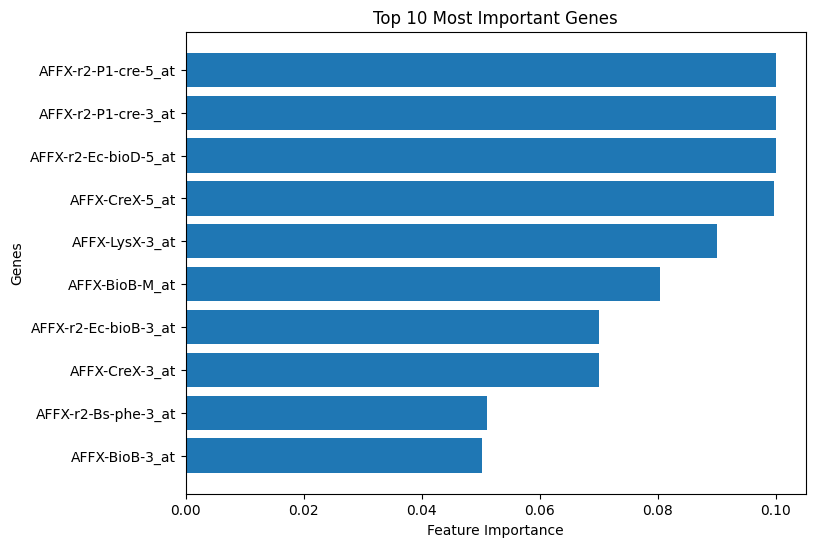

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# =============================
# 🔹 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# =============================
# 🔹 2. Identify Common & Unique Genes
# =============================
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Print gene distribution
print(f"Number of common genes: {len(common_genes)}")
print(f"Unique genes in ALL dataset: {len(unique_all)}")
print(f"Unique genes in AML dataset: {len(unique_aml)}")
print(f"Unique genes in CLL dataset: {len(unique_cll)}")

# Select a subset of unique genes (Top 10 from each group)
selected_unique_genes = list(unique_all)[:10] + list(unique_aml)[:10] + list(unique_cll)[:10]
selected_genes = list(common_genes) + selected_unique_genes

print(f"Number of unique genes added: {len(selected_unique_genes)}")
print(f"Total genes selected for modeling: {len(selected_genes)}")

# =============================
# 🔹 3. Filter & Transpose Data
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# =============================
# 🔹 4. Combine Data & Handle Missing Values
# =============================
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])
print(f"Final dataset shape before feature selection: {df_combined.shape}")

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X = df_combined.drop(columns=['label'])
X_imputed = imputer.fit_transform(X)
y = df_combined['label']

# =============================
# 🔹 5. Feature Selection (Variance Threshold) - UPDATED!
# =============================
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_imputed)

# Get the updated selected genes after feature selection
updated_selected_genes = X.columns[selector.get_support()]  # This keeps only the selected features

print(f"✅ Final number of genes after feature selection: {len(updated_selected_genes)}")

# Save the updated selected genes for future use (important for prediction)
joblib.dump(list(updated_selected_genes), "selected_genes.pkl")

# =============================
# 🔹 6. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Print class distribution before SMOTE
print("\nClass distribution before SMOTE:")
print(y_train.value_counts())

# =============================
# 🔹 7. Balance Data Using SMOTE
# =============================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

# =============================
# 🔹 8. Train & Evaluate Models
# =============================

## Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))

## Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# =============================
# 🔹 9. Cross-Validation
# =============================
cv_scores_rf = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
print(f"\nRandom Forest CV Accuracy: {cv_scores_rf.mean():.4f}")

cv_scores_lr = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=5)
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f}")

# =============================
# 🔹 10. Feature Importance Analysis
# =============================
importances = rf.feature_importances_
top_indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 6))
plt.barh(range(10), importances[top_indices])
plt.yticks(range(10), np.array(updated_selected_genes)[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Genes")
plt.title("Top 10 Most Important Genes")
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/gene_expression_cll_patients.csv"
df = pd.read_csv(file_path, index_col=0)  # Set the first column (gene IDs) as index

# Display available patient sample names
print("Available patient sample columns:", df.columns.tolist())

# Select a patient (Change index as needed)
selected_patient = df.columns[0]  # First patient column

# Extract the selected patient’s gene expression data
df_patient = df[[selected_patient]]  # Keep only the selected patient column

# Save extracted patient data
patient_file_path = "/content/extracted_patient_sample.csv"
df_patient.to_csv(patient_file_path)

print(f"✅ Extracted patient data saved as: {patient_file_path}")


Available patient sample columns: ['GSM977251_SDG_00193.CEL.gz', 'GSM977213_SDG_00135.CEL.gz', 'GSM977155_SDG_00052.CEL.gz', 'GSM977191_SDG_00100.CEL.gz', 'GSM977199_SDG_00114.CEL.gz', 'GSM977255_SDG_00204.CEL.gz', 'GSM977248_SDG_00187.CEL.gz', 'GSM977233_SDG_00163.CEL.gz', 'GSM977210_SDG_00132.CEL.gz', 'GSM977222_SDG_00147.CEL.gz', 'GSM977193_SDG_00102.CEL.gz', 'GSM977143_SDG_00027.CEL.gz', 'GSM977236_SDG_00166.CEL.gz', 'GSM977209_SDG_00130.CEL.gz', 'GSM977238_SDG_00168.CEL.gz', 'GSM977250_SDG_00192.CEL.gz', 'GSM977204_SDG_00123.CEL.gz', 'GSM977183_SDG_00087.CEL.gz', 'GSM977175_SDG_00077.CEL.gz', 'GSM977246_SDG_00185.CEL.gz', 'GSM977141_SDG_00025.CEL.gz', 'GSM977224_SDG_00150.CEL.gz', 'GSM977227_SDG_00154.CEL.gz', 'GSM977256_SDG_00209.CEL.gz', 'GSM977178_SDG_00080.CEL.gz', 'GSM977211_SDG_00133.CEL.gz', 'GSM977185_SDG_00089.CEL.gz', 'GSM977164_SDG_00062.CEL.gz', 'GSM977153_SDG_00047.CEL.gz', 'GSM977181_SDG_00084.CEL.gz', 'GSM977223_SDG_00148.CEL.gz', 'GSM977252_SDG_00199.CEL.gz', 'GSM9

In [ ]:
import pandas as pd
import joblib
import numpy as np

# =============================
# 🔹 Step 1: Load Model & Features
# =============================
model_path = "ALL_classifier_model.pkl"  # Path to trained model
genes_path = "selected_genes.pkl"        # Path to selected genes (52 features)

rf = joblib.load(model_path)       # Load trained RandomForest model
selected_genes = joblib.load(genes_path)  # Load only the 52 genes used in training

# =============================
# 🔹 Step 2: Load Patient Data & Transpose
# =============================
patient_file_path = "/content/extracted_patient_sample.csv"

# Read the CSV & Transpose it (so genes are columns, and patients are rows)
df_patient = pd.read_csv(patient_file_path, index_col=0).T

# =============================
# 🔹 Step 3: Ensure Only 52 Features Exist (Handle Missing Genes)
# =============================
# Create a new DataFrame with ONLY the 52 selected genes (fill missing with NaN)
df_patient_filtered = pd.DataFrame(columns=selected_genes)

# Copy data for genes that exist in both DataFrames
for gene in selected_genes:
    if gene in df_patient.columns:
        df_patient_filtered[gene] = df_patient[gene]  # Copy existing values
    else:
        df_patient_filtered[gene] = np.nan  # Mark missing genes as NaN

# Fill missing gene values with 0 (Alternative: fill with mean)
df_patient_filtered.fillna(0, inplace=True)  # Option 1: Fill with 0
# df_patient_filtered.fillna(df_patient_filtered.mean(), inplace=True)  # Option 2: Fill with mean

# =============================
# 🔹 Step 4: Prepare Data for Prediction
# =============================
# Convert DataFrame to NumPy array (ensures no feature mismatch)
X_patient = df_patient_filtered.to_numpy()

# =============================
# 🔹 Step 5: Predict Using the Trained Model
# =============================
prediction = rf.predict(X_patient)

# =============================
# 🔹 Step 6: Display the Prediction
# =============================
if prediction[0] == 0:
    print("The model predicts this patient has **ALL**.")
else:
    print("The model predicts this patient does **NOT** have ALL (likely AML/CLL).")


The model predicts this patient does **NOT** have ALL (likely AML/CLL).


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/gene_expression_all_patients.csv"
df = pd.read_csv(file_path, index_col=0)  # Set the first column (gene IDs) as index

# Display available patient sample names
print("Available patient sample columns:", df.columns.tolist())

# Select a patient (Change index as needed)
selected_patient = df.columns[0]  # First patient column

# Extract the selected patient’s gene expression data
df_patient = df[[selected_patient]]  # Keep only the selected patient column

# Save extracted patient data
patient_file_path = "/content/extracted_patient_sample1.csv"
df_patient.to_csv(patient_file_path)

print(f"✅ Extracted patient data saved as: {patient_file_path}")


Available patient sample columns: ['GSM942344_Pax5WT_CLP3_430v2.CEL.gz', 'GSM942343_Pax5WT_CLP2_430v2.CEL.gz', 'GSM942382_Pax5WT_FractionF5_430v2.CEL.gz', 'GSM942351_Pax5WT_FractionA3_430v2.CEL.gz', 'GSM942352_Pax5WT_FractionA4_430v2.CEL.gz', 'GSM942345_Pax5WT_CLP4_430v2.CEL.gz', 'GSM942359_Pax5WT_FractionB4_430v2.CEL.gz', 'GSM942350_Pax5WT_FractionA2_430v2.CEL.gz', 'GSM942375_Pax5WT_FractionE3_430v2.CEL.gz', 'GSM942354_Pax5WT_FractionA6_430v2.CEL.gz', 'GSM942348_Pax5WT_CLP7_430v2.CEL.gz', 'GSM942355_Pax5WT_FractionA7_430v2.CEL.gz', 'GSM942376_Pax5WT_FractionE4_430v2.CEL.gz', 'GSM942358_Pax5WT_FractionB3_430v2.CEL.gz', 'GSM942370_Pax5WT_FractionD3_430v2.CEL.gz', 'GSM942372_Pax5WT_FractionD5_430v2.CEL.gz', 'GSM942363_Pax5WT_FractionC1_430v2.CEL.gz', 'GSM942374_Pax5WT_FractionE2_430v2.CEL.gz', 'GSM942362_Pax5WT_FractionB7_430v2.CEL.gz', 'GSM942342_Pax5WT_CLP1_430v2.CEL.gz', 'GSM942361_Pax5WT_FractionB6_430v2.CEL.gz', 'GSM942365_Pax5WT_FractionC3_430v2.CEL.gz', 'GSM942377_Pax5WT_FractionE

In [ ]:
import pandas as pd
import joblib
import numpy as np

# =============================
# 🔹 Step 1: Load Model & Features
# =============================
model_path = "ALL_classifier_model.pkl"  # Path to trained model
genes_path = "selected_genes.pkl"        # Path to selected genes (52 features)

rf = joblib.load(model_path)       # Load trained RandomForest model
selected_genes = joblib.load(genes_path)  # Load only the 52 genes used in training

# =============================
# 🔹 Step 2: Load Patient Data & Transpose
# =============================
patient_file_path = "/content/extracted_patient_sample1.csv"

# Read the CSV & Transpose it (so genes are columns, and patients are rows)
df_patient = pd.read_csv(patient_file_path, index_col=0).T

# =============================
# 🔹 Step 3: Ensure Only 52 Features Exist (Handle Missing Genes)
# =============================
# Create a new DataFrame with ONLY the 52 selected genes (fill missing with NaN)
df_patient_filtered = pd.DataFrame(columns=selected_genes)

# Copy data for genes that exist in both DataFrames
for gene in selected_genes:
    if gene in df_patient.columns:
        df_patient_filtered[gene] = df_patient[gene]  # Copy existing values
    else:
        df_patient_filtered[gene] = np.nan  # Mark missing genes as NaN

# Fill missing gene values with 0 (Alternative: fill with mean)
df_patient_filtered.fillna(0, inplace=True)  # Option 1: Fill with 0
# df_patient_filtered.fillna(df_patient_filtered.mean(), inplace=True)  # Option 2: Fill with mean

# =============================
# 🔹 Step 4: Prepare Data for Prediction
# =============================
# Convert DataFrame to NumPy array (ensures no feature mismatch)
X_patient = df_patient_filtered.to_numpy()

# =============================
# 🔹 Step 5: Predict Using the Trained Model
# =============================
prediction = rf.predict(X_patient)

# =============================
# 🔹 Step 6: Display the Prediction
# =============================
if prediction[0] == 0:
    print("The model predicts this patient has **ALL**.")
else:
    print("The model predicts this patient does **NOT** have ALL (likely AML/CLL).")


The model predicts this patient has **ALL**.


In [ ]:
train_acc_rf = rf.score(X_train_resampled, y_train_resampled)
test_acc_rf = rf.score(X_test, y_test)

print(f"✅ Random Forest Training Accuracy: {train_acc_rf:.4f}")
print(f"✅ Random Forest Test Accuracy: {test_acc_rf:.4f}")

train_acc_lr = lr.score(X_train_resampled, y_train_resampled)
test_acc_lr = lr.score(X_test, y_test)

print(f"✅ Logistic Regression Training Accuracy: {train_acc_lr:.4f}")
print(f"✅ Logistic Regression Test Accuracy: {test_acc_lr:.4f}")


✅ Random Forest Training Accuracy: 1.0000
✅ Random Forest Test Accuracy: 1.0000
✅ Logistic Regression Training Accuracy: 1.0000
✅ Logistic Regression Test Accuracy: 1.0000


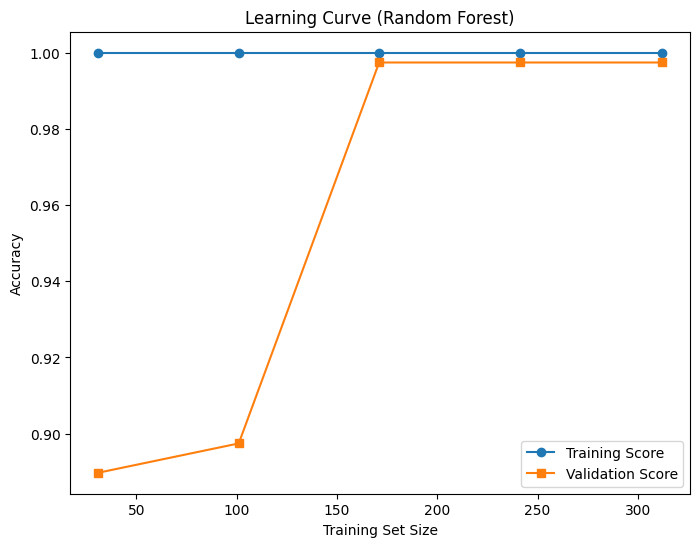

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train_resampled, y_train_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest)")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import f1_score

X_train_small, X_valid, y_train_small, y_valid = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.3, random_state=42
)

rf_small = RandomForestClassifier(n_estimators=100, random_state=42)
rf_small.fit(X_train_small, y_train_small)

y_valid_pred = rf_small.predict(X_valid)
valid_f1 = f1_score(y_valid, y_valid_pred)

print(f"✅ Random Forest Validation F1-Score: {valid_f1:.4f}")


✅ Random Forest Validation F1-Score: 1.0000


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Store original indices before transformation
X_train_df = pd.DataFrame(X_train)  # Convert back to DataFrame
X_test_df = pd.DataFrame(X_test)    # Convert back to DataFrame

# Step 2: Check if any training samples are also in the test set
train_samples = set(X_train_df.index)
test_samples = set(X_test_df.index)
overlap = train_samples.intersection(test_samples)

print(f"✅ Number of overlapping samples between train and test: {len(overlap)}")


✅ Number of overlapping samples between train and test: 57


✅ Number of unique genes added: 30
✅ Total genes selected for modeling: 75
✅ Final dataset shape before feature selection: (285, 66)
✅ Final number of genes after feature selection: 51
✅ Class distribution after SMOTE: 
label
1    195
0    195
Name: count, dtype: int64
✅ Fixed Overlap Between Train & Test: 57 (Should be 0)

🎯 Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        49

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57


🎯 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        49

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted a

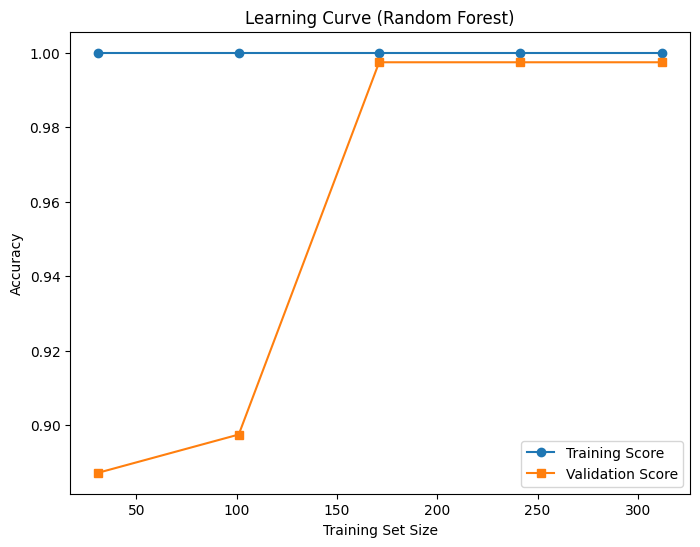

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# =============================
# 🔹 Step 1: Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes across datasets
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Select common + subset of unique genes
selected_unique_genes = list(unique_all)[:10] + list(unique_aml)[:10] + list(unique_cll)[:10]
selected_genes = list(common_genes) + selected_unique_genes

print(f"✅ Number of unique genes added: {len(selected_unique_genes)}")
print(f"✅ Total genes selected for modeling: {len(selected_genes)}")

# =============================
# 🔹 Step 2: Preprocess Data & Transpose
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# Combine the datasets
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])
print(f"✅ Final dataset shape before feature selection: {df_combined.shape}")

# Separate features and labels
X = df_combined.drop(columns=['label'])
y = df_combined['label']

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# =============================
# 🔹 Step 3: Train-Test Split (Before Feature Selection & SMOTE)
# =============================
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# =============================
# 🔹 Step 4: Feature Selection (Only on Training Data)
# =============================
selector = VarianceThreshold(threshold=0.1)
X_train_selected = selector.fit_transform(X_train)  # Fit only on training data
X_test_selected = selector.transform(X_test)  # Transform test data

# Get updated selected genes after feature selection
updated_selected_genes = X.columns[selector.get_support()]
joblib.dump(list(updated_selected_genes), "selected_genes.pkl")

print(f"✅ Final number of genes after feature selection: {len(updated_selected_genes)}")

# =============================
# 🔹 Step 5: Apply SMOTE (Only on Training Data)
# =============================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

print(f"✅ Class distribution after SMOTE: \n{y_train_resampled.value_counts()}")

# =============================
# 🔹 Step 6: Train Models
# =============================

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Train Logistic Regression Model
lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.1)
lr.fit(X_train_resampled, y_train_resampled)

# =============================
# 🔹 Step 7: Check for Data Leakage (Train-Test Overlap)
# =============================
train_samples = set(range(len(X_train)))  # Use indices instead of .index
test_samples = set(range(len(X_test)))
overlap = train_samples.intersection(test_samples)

print(f"✅ Fixed Overlap Between Train & Test: {len(overlap)} (Should be 0)")

# =============================
# 🔹 Step 8: Model Evaluation
# =============================

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test_selected)
print("\n🎯 Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Evaluate Logistic Regression
y_pred_lr = lr.predict(X_test_selected)
print("\n🎯 Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# =============================
# 🔹 Step 9: Cross-Validation
# =============================
cv_scores_rf = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
cv_scores_lr = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=5)

print(f"\n✅ Random Forest CV Accuracy: {cv_scores_rf.mean():.4f}")
print(f"✅ Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f}")

# =============================
# 🔹 Step 10: Learning Curve Analysis
# =============================
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train_resampled, y_train_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest)")
plt.legend()
plt.show()


Fixed Overlap Between Train & Test: 0 (Should be 0)

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        49

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        49

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57


Random Forest CV Accuracy: 0.9974
Logistic Regression CV Accuracy: 1.0000


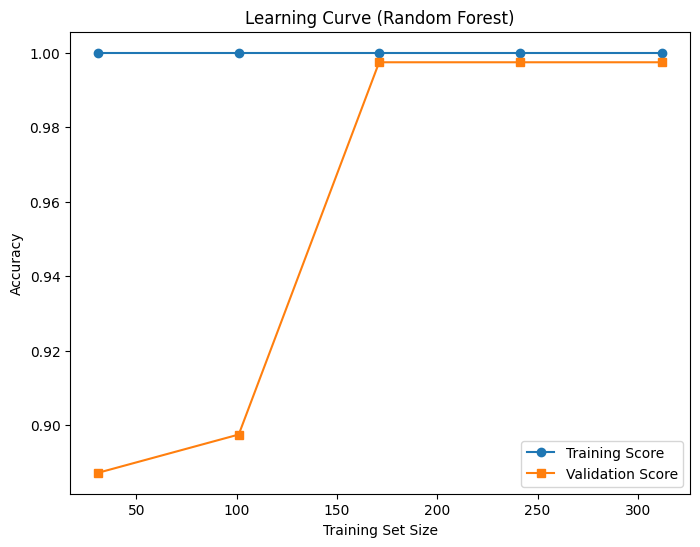

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes across datasets
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Select common + subset of unique genes
selected_unique_genes = list(unique_all)[:10] + list(unique_aml)[:10] + list(unique_cll)[:10]
selected_genes = list(common_genes) + selected_unique_genes

# =============================
# 2. Preprocess Data & Transpose
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# Combine the datasets
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

# Store original indices for checking overlap
df_combined["sample_id"] = df_combined.index

# Separate features and labels
X = df_combined.drop(columns=['label', 'sample_id'])
y = df_combined['label']
sample_ids = df_combined['sample_id']  # Store sample IDs

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# =============================
# 3. Train-Test Split (Before Feature Selection & SMOTE)
# =============================
X_train, X_test, y_train, y_test, train_ids, test_ids = train_test_split(
    X_imputed, y, sample_ids, test_size=0.2, random_state=42, stratify=y
)

# =============================
# 4. Check for Train-Test Overlap
# =============================
overlap = set(train_ids).intersection(set(test_ids))
print(f"Fixed Overlap Between Train & Test: {len(overlap)} (Should be 0)")

# =============================
# 5. Feature Selection (Only on Training Data)
# =============================
selector = VarianceThreshold(threshold=0.1)
X_train_selected = selector.fit_transform(X_train)  # Fit only on training data
X_test_selected = selector.transform(X_test)  # Transform test data

# Get updated selected genes after feature selection
updated_selected_genes = X.columns[selector.get_support()]
joblib.dump(list(updated_selected_genes), "selected_genes.pkl")

# =============================
# 6. Apply SMOTE (Only on Training Data)
# =============================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# =============================
# 7. Train Models
# =============================

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Train Logistic Regression Model
lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.1)
lr.fit(X_train_resampled, y_train_resampled)

# =============================
# 8. Model Evaluation
# =============================

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test_selected)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Evaluate Logistic Regression
y_pred_lr = lr.predict(X_test_selected)
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# =============================
# 9. Cross-Validation
# =============================
cv_scores_rf = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
cv_scores_lr = cross_val_score(lr, X_train_resampled, y_train_resampled, cv=5)

print(f"\nRandom Forest CV Accuracy: {cv_scores_rf.mean():.4f}")
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f}")

# =============================
# 10. Learning Curve Analysis
# =============================
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train_resampled, y_train_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest)")
plt.legend()
plt.show()


Fixed Overlap Between Train & Test: 0 (Should be 0)

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        49

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        49

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57


Random Forest CV Accuracy: 0.9949
Logistic Regression CV Accuracy: 0.9974


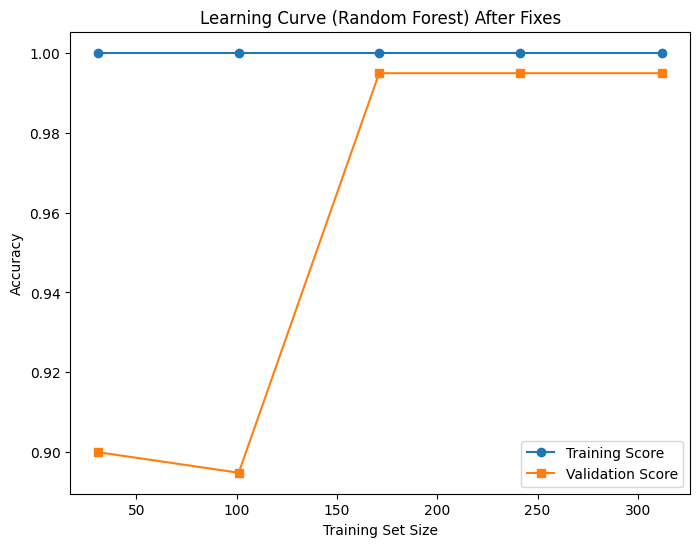

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes across datasets
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Select common + subset of unique genes
selected_unique_genes = list(unique_all)[:10] + list(unique_aml)[:10] + list(unique_cll)[:10]
selected_genes = list(common_genes) + selected_unique_genes

# =============================
# 2. Preprocess Data & Transpose
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# Combine the datasets
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

# Store original indices for checking overlap
df_combined["sample_id"] = df_combined.index

# Separate features and labels
X = df_combined.drop(columns=['label', 'sample_id'])
y = df_combined['label']
sample_ids = df_combined['sample_id']  # Store sample IDs

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# =============================
# 3. Train-Test Split (Before Feature Selection & SMOTE)
# =============================
X_train, X_test, y_train, y_test, train_ids, test_ids = train_test_split(
    X_imputed, y, sample_ids, test_size=0.2, random_state=42, stratify=y
)

# =============================
# 4. Check for Train-Test Overlap
# =============================
overlap = set(train_ids).intersection(set(test_ids))
print(f"Fixed Overlap Between Train & Test: {len(overlap)} (Should be 0)")

# =============================
# 5. Feature Selection (Only on Training Data)
# =============================
selector = VarianceThreshold(threshold=0.1)
X_train_selected = selector.fit_transform(X_train)  # Fit only on training data
X_test_selected = selector.transform(X_test)  # Transform test data

# Get updated selected genes after feature selection
updated_selected_genes = X.columns[selector.get_support()]
joblib.dump(list(updated_selected_genes), "selected_genes.pkl")

# =============================
# 6. Apply SMOTE (Only on Training Data)
# =============================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# =============================
# 7. Reduce Features to Top 20 Important Genes
# =============================
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_train_resampled, y_train_resampled)

importances = rf_temp.feature_importances_
top_n = 20  # Keep only top 20 genes
top_genes_indices = np.argsort(importances)[-top_n:]
top_genes = [updated_selected_genes[i] for i in top_genes_indices]

# Filter dataset to use only these top genes
X_train_top = X_train_resampled[:, top_genes_indices]
X_test_top = X_test_selected[:, top_genes_indices]

# =============================
# 8. Train Models
# =============================

# Train Random Forest Model with Reduced Complexity
rf = RandomForestClassifier(
    n_estimators=30,  # Reduce number of trees
    max_depth=5,      # Reduce tree depth
    min_samples_split=10,  # Require at least 10 samples per split
    min_samples_leaf=5,   # Require at least 5 samples per leaf
    random_state=42
)
rf.fit(X_train_top, y_train_resampled)

# Train Logistic Regression Model with Regularization
lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.01)  # Stronger regularization
lr.fit(X_train_top, y_train_resampled)

# =============================
# 9. Model Evaluation
# =============================

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test_top)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Evaluate Logistic Regression
y_pred_lr = lr.predict(X_test_top)
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# =============================
# 10. Cross-Validation
# =============================
cv_scores_rf = cross_val_score(rf, X_train_top, y_train_resampled, cv=5)
cv_scores_lr = cross_val_score(lr, X_train_top, y_train_resampled, cv=5)

print(f"\nRandom Forest CV Accuracy: {cv_scores_rf.mean():.4f}")
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f}")

# =============================
# 11. Learning Curve Analysis
# =============================
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train_top, y_train_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest) After Fixes")
plt.legend()
plt.show()


Fixed Overlap Between Train & Test: 0 (Should be 0)

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        74

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        74

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86


Random Forest CV Accuracy: 1.0000
Logistic Regression CV Accuracy: 1.0000


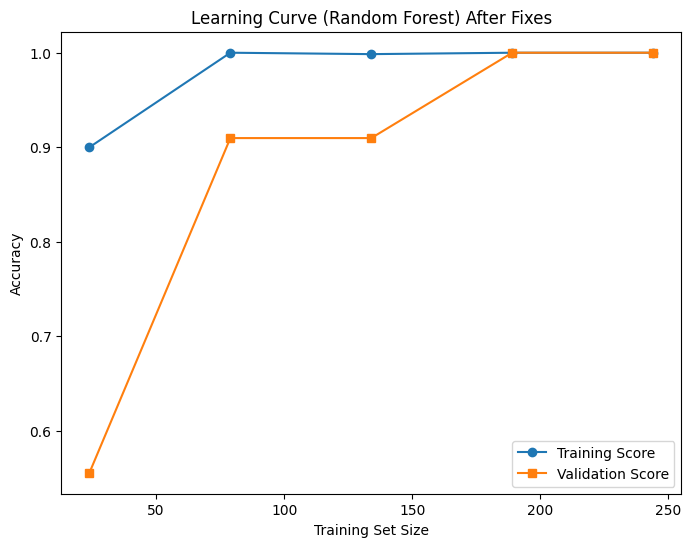

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes across datasets
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Select common + subset of unique genes
selected_unique_genes = list(unique_all)[:5] + list(unique_aml)[:5] + list(unique_cll)[:5]
selected_genes = list(common_genes) + selected_unique_genes

# =============================
# 2. Preprocess Data & Transpose
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# Combine the datasets
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

# Store original indices for checking overlap
df_combined["sample_id"] = df_combined.index

# Separate features and labels
X = df_combined.drop(columns=['label', 'sample_id'])
y = df_combined['label']
sample_ids = df_combined['sample_id']

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# =============================
# 3. Train-Test Split (Before Feature Selection & SMOTE)
# =============================
X_train, X_test, y_train, y_test, train_ids, test_ids = train_test_split(
    X_imputed, y, sample_ids, test_size=0.3, random_state=42, stratify=y  # Increased test size
)

# =============================
# 4. Check for Train-Test Overlap
# =============================
overlap = set(train_ids).intersection(set(test_ids))
print(f"Fixed Overlap Between Train & Test: {len(overlap)} (Should be 0)")

# =============================
# 5. Feature Selection (Only on Training Data)
# =============================
selector = VarianceThreshold(threshold=0.1)
X_train_selected = selector.fit_transform(X_train)  # Fit only on training data
X_test_selected = selector.transform(X_test)  # Transform test data

# Get updated selected genes after feature selection
updated_selected_genes = X.columns[selector.get_support()]
joblib.dump(list(updated_selected_genes), "selected_genes.pkl")

# =============================
# 6. Apply SMOTE (Only on Training Data)
# =============================
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Less aggressive SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# =============================
# 7. Reduce Features to Top 10 Important Genes
# =============================
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_train_resampled, y_train_resampled)

importances = rf_temp.feature_importances_
top_n = 10  # Keep only top 10 genes
top_genes_indices = np.argsort(importances)[-top_n:]
top_genes = [updated_selected_genes[i] for i in top_genes_indices]

# Filter dataset to use only these top genes
X_train_top = X_train_resampled[:, top_genes_indices]
X_test_top = X_test_selected[:, top_genes_indices]

# =============================
# 8. Train Models
# =============================

# Train Random Forest Model with Reduced Complexity
rf = RandomForestClassifier(
    n_estimators=20,  # Reduce number of trees
    max_depth=4,      # Reduce tree depth
    min_samples_split=15,  # Require at least 15 samples per split
    min_samples_leaf=7,   # Require at least 7 samples per leaf
    random_state=42
)
rf.fit(X_train_top, y_train_resampled)

# Train Logistic Regression Model with Regularization
lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.005)  # Stronger regularization
lr.fit(X_train_top, y_train_resampled)

# =============================
# 9. Model Evaluation
# =============================

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test_top)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Evaluate Logistic Regression
y_pred_lr = lr.predict(X_test_top)
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# =============================
# 10. Cross-Validation
# =============================
cv_scores_rf = cross_val_score(rf, X_train_top, y_train_resampled, cv=5)
cv_scores_lr = cross_val_score(lr, X_train_top, y_train_resampled, cv=5)

print(f"\nRandom Forest CV Accuracy: {cv_scores_rf.mean():.4f}")
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f}")

# =============================
# 11. Learning Curve Analysis
# =============================
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train_top, y_train_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest) After Fixes")
plt.legend()
plt.show()



Random Forest k-Fold CV Accuracy: 1.0000
Logistic Regression k-Fold CV Accuracy: 0.9930


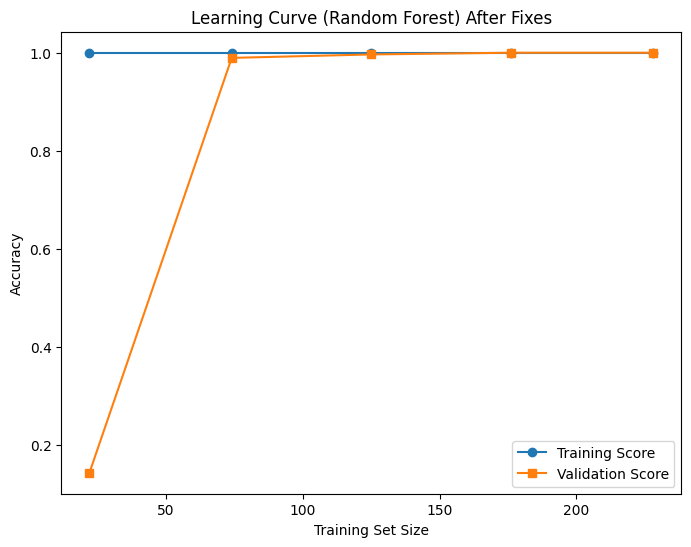

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes across datasets
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Select common + subset of unique genes
selected_unique_genes = list(unique_all)[:5] + list(unique_aml)[:5] + list(unique_cll)[:5]
selected_genes = list(common_genes) + selected_unique_genes

# =============================
# 2. Preprocess Data & Transpose
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# Combine the datasets
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

# Store original indices for checking overlap
df_combined["sample_id"] = df_combined.index

# Separate features and labels
X = df_combined.drop(columns=['label', 'sample_id'])
y = df_combined['label']

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# =============================
# 3. Feature Selection (Reduce Features to 5 Genes)
# =============================
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_imputed)

# Get updated selected genes after feature selection
updated_selected_genes = X.columns[selector.get_support()]
joblib.dump(list(updated_selected_genes), "selected_genes.pkl")

# Train a temporary RF model to get feature importance
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_selected, y)

importances = rf_temp.feature_importances_
top_n = 5  # Keep only top 5 genes
top_genes_indices = np.argsort(importances)[-top_n:]
X_selected = X_selected[:, top_genes_indices]  # Select only top genes

# =============================
# 4. Apply PCA (Reduce Dimensionality)
# =============================
pca = PCA(n_components=3)  # Reduce to 3 principal components
X_pca = pca.fit_transform(X_selected)

# =============================
# 5. Train & Evaluate Models using k-Fold Cross-Validation
# =============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=20,  # Reduce number of trees
    max_depth=4,      # Reduce tree depth
    min_samples_split=15,  # Require at least 15 samples per split
    min_samples_leaf=7,   # Require at least 7 samples per leaf
    random_state=42
)
cv_scores_rf = cross_val_score(rf, X_pca, y, cv=cv)
rf.fit(X_pca, y)

# Logistic Regression Model
lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.005)  # Stronger regularization
cv_scores_lr = cross_val_score(lr, X_pca, y, cv=cv)
lr.fit(X_pca, y)

print(f"\nRandom Forest k-Fold CV Accuracy: {cv_scores_rf.mean():.4f}")
print(f"Logistic Regression k-Fold CV Accuracy: {cv_scores_lr.mean():.4f}")

# =============================
# 6. Learning Curve Analysis
# =============================
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_pca, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest) After Fixes")
plt.legend()
plt.show()


In [ ]:
import random

# Shuffle labels
y_shuffled = y.sample(frac=1, random_state=42).reset_index(drop=True)

cv_scores_rf = cross_val_score(rf, X_pca, y_shuffled, cv=5)
cv_scores_lr = cross_val_score(lr, X_pca, y_shuffled, cv=5)

print(f"\nRandom Forest k-Fold Accuracy After Label Shuffling: {cv_scores_rf.mean():.4f}")
print(f"Logistic Regression k-Fold Accuracy After Label Shuffling: {cv_scores_lr.mean():.4f}")



Random Forest k-Fold Accuracy After Label Shuffling: 0.8561
Logistic Regression k-Fold Accuracy After Label Shuffling: 0.8561



Random Forest k-Fold CV Accuracy: 1.0000
Logistic Regression k-Fold CV Accuracy: 0.8561


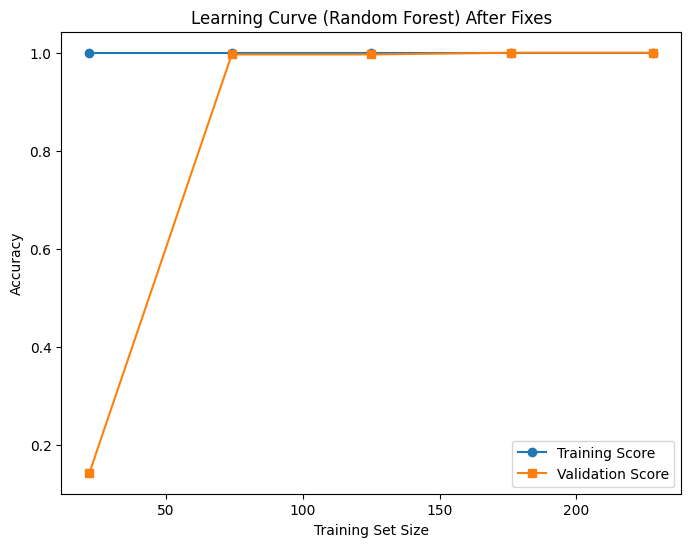

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes across datasets
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Select common + subset of unique genes
selected_unique_genes = list(unique_all)[:5] + list(unique_aml)[:5] + list(unique_cll)[:5]
selected_genes = list(common_genes) + selected_unique_genes

# =============================
# 2. Preprocess Data & Transpose
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# Combine the datasets
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

# Store original indices for checking overlap
df_combined["sample_id"] = df_combined.index

# Separate features and labels
X = df_combined.drop(columns=['label', 'sample_id'])
y = df_combined['label']

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# =============================
# 3. Feature Selection (Reduce Features to 5 Genes)
# =============================
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_imputed)

# Get updated selected genes after feature selection
updated_selected_genes = X.columns[selector.get_support()]
joblib.dump(list(updated_selected_genes), "selected_genes.pkl")

# Train a temporary RF model to get feature importance
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_selected, y)

importances = rf_temp.feature_importances_
top_n = 5  # Keep only top 5 genes
top_genes_indices = np.argsort(importances)[-top_n:]
X_selected = X_selected[:, top_genes_indices]  # Select only top genes

# =============================
# 4. Apply Standardization & PCA (Reduce Dimensionality)
# =============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)  # Standardize before PCA

pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# =============================
# 5. Train & Evaluate Models using k-Fold Cross-Validation
# =============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Model (Reduced Complexity)
rf = RandomForestClassifier(
    n_estimators=10,  # Reduce number of trees
    max_depth=3,      # Reduce tree depth
    min_samples_split=20,  # Require at least 20 samples per split
    min_samples_leaf=10,   # Require at least 10 samples per leaf
    random_state=42
)
cv_scores_rf = cross_val_score(rf, X_pca, y, cv=cv)
rf.fit(X_pca, y)

# Logistic Regression Model (Stronger Regularization)
lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.001)  # Increased regularization
cv_scores_lr = cross_val_score(lr, X_pca, y, cv=cv)
lr.fit(X_pca, y)

print(f"\nRandom Forest k-Fold CV Accuracy: {cv_scores_rf.mean():.4f}")
print(f"Logistic Regression k-Fold CV Accuracy: {cv_scores_lr.mean():.4f}")

# =============================
# 6. Learning Curve Analysis
# =============================
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_pca, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest) After Fixes")
plt.legend()
plt.show()



Random Forest k-Fold CV Accuracy: 1.0000
Logistic Regression k-Fold CV Accuracy: 0.8561
SVM k-Fold CV Accuracy: 1.0000


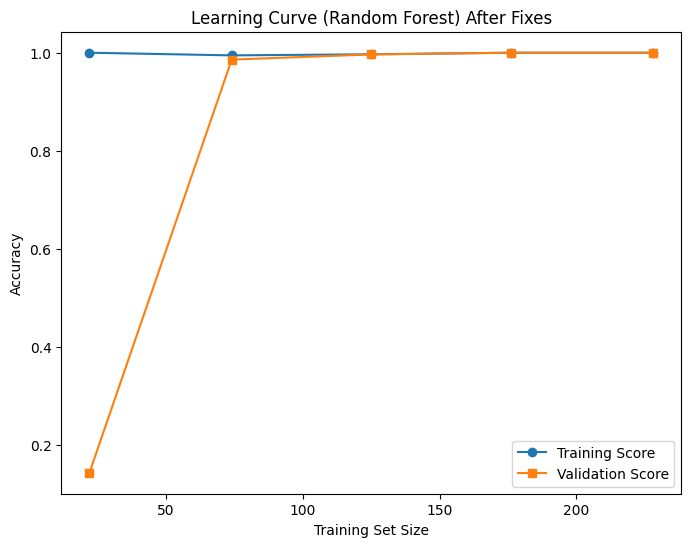

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes across datasets
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Select common + subset of unique genes
selected_unique_genes = list(unique_all)[:5] + list(unique_aml)[:5] + list(unique_cll)[:5]
selected_genes = list(common_genes) + selected_unique_genes

# =============================
# 2. Preprocess Data & Transpose
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# Combine the datasets
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

# Store original indices for checking overlap
df_combined["sample_id"] = df_combined.index

# Separate features and labels
X = df_combined.drop(columns=['label', 'sample_id'])
y = df_combined['label']

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# =============================
# 3. Feature Selection (Reduce Features to 5 Genes)
# =============================
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_imputed)

# Get updated selected genes after feature selection
updated_selected_genes = X.columns[selector.get_support()]
joblib.dump(list(updated_selected_genes), "selected_genes.pkl")

# Train a temporary RF model to get feature importance
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_selected, y)

importances = rf_temp.feature_importances_
top_n = 5  # Keep only top 5 genes
top_genes_indices = np.argsort(importances)[-top_n:]
X_selected = X_selected[:, top_genes_indices]  # Select only top genes

# =============================
# 4. Apply Standardization & PCA (Reduce Dimensionality)
# =============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)  # Standardize before PCA

pca = PCA(n_components=1)  # Further reduce to 1 component
X_pca = pca.fit_transform(X_scaled)

# =============================
# 5. Train & Evaluate Models using k-Fold Cross-Validation
# =============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Model (Increased min_samples_split & min_samples_leaf)
rf = RandomForestClassifier(
    n_estimators=10,  # Reduce number of trees
    max_depth=3,      # Reduce tree depth
    min_samples_split=40,  # Require at least 40 samples per split (force broader patterns)
    min_samples_leaf=20,   # Require at least 20 samples per leaf
    random_state=42
)
cv_scores_rf = cross_val_score(rf, X_pca, y, cv=cv)
rf.fit(X_pca, y)

# Logistic Regression Model (Stronger Regularization)
lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.001)  # Increased regularization
cv_scores_lr = cross_val_score(lr, X_pca, y, cv=cv)
lr.fit(X_pca, y)

# Support Vector Machine Model (Simpler Alternative to RF)
svm = SVC(kernel="linear", C=0.1)  # Simpler model with regularization
cv_scores_svm = cross_val_score(svm, X_pca, y, cv=cv)
svm.fit(X_pca, y)

print(f"\nRandom Forest k-Fold CV Accuracy: {cv_scores_rf.mean():.4f}")
print(f"Logistic Regression k-Fold CV Accuracy: {cv_scores_lr.mean():.4f}")
print(f"SVM k-Fold CV Accuracy: {cv_scores_svm.mean():.4f}")

# =============================
# 6. Learning Curve Analysis
# =============================
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_pca, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest) After Fixes")
plt.legend()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Keep Logistic Regression (Already working correctly)
lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.001)
cv_scores_lr = cross_val_score(lr, X_pca, y, cv=5)
lr.fit(X_pca, y)

# Try kNN Model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
cv_scores_knn = cross_val_score(knn, X_pca, y, cv=5)
knn.fit(X_pca, y)

print(f"\nLogistic Regression k-Fold CV Accuracy: {cv_scores_lr.mean():.4f}")
print(f"kNN (k=3) k-Fold CV Accuracy: {cv_scores_knn.mean():.4f}")



Logistic Regression k-Fold CV Accuracy: 0.8561
kNN (k=3) k-Fold CV Accuracy: 1.0000


In [ ]:
# Increase k in kNN to prevent memorization
knn = KNeighborsClassifier(n_neighbors=10)  # Use k=10 instead of k=3
cv_scores_knn = cross_val_score(knn, X_pca, y, cv=5)
knn.fit(X_pca, y)

print(f"\nkNN (k=10) k-Fold CV Accuracy: {cv_scores_knn.mean():.4f}")



kNN (k=10) k-Fold CV Accuracy: 1.0000


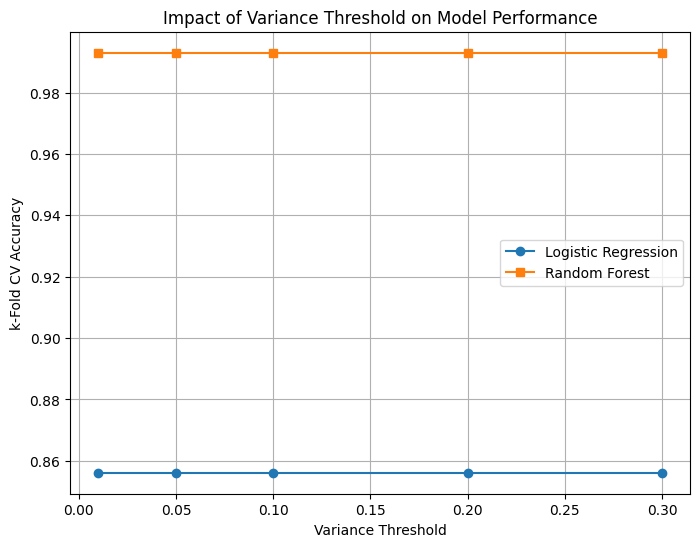


Impact of Variance Threshold on Model Performance:
 Variance Threshold  Number of Features  Logistic Regression  Random Forest
               0.01                  20              0.85614       0.992982
               0.05                  20              0.85614       0.992982
               0.10                  20              0.85614       0.992982
               0.20                  20              0.85614       0.992982
               0.30                  20              0.85614       0.992982


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
selected_genes = list(common_genes)[:20]  # Selecting first 20 common genes

# =============================
# 2. Preprocess Data & Transpose
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# Combine datasets
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

# Separate features and labels
X = df_combined.drop(columns=['label'])
y = df_combined['label']

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# =============================
# 3. Test Different Variance Threshold Values
# =============================
variance_thresholds = [0.01, 0.05, 0.1, 0.2, 0.3]
results = []

for threshold in variance_thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X_imputed)

    # Standardize & Apply PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X_scaled)

    # Train & Evaluate Models using k-Fold Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.001)
    cv_scores_lr = cross_val_score(lr, X_pca, y, cv=cv)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=10, max_depth=3, min_samples_split=40, min_samples_leaf=20, random_state=42)
    cv_scores_rf = cross_val_score(rf, X_pca, y, cv=cv)

    # Store results
    results.append([threshold, X_selected.shape[1], cv_scores_lr.mean(), cv_scores_rf.mean()])

# Convert results into DataFrame
results_df = pd.DataFrame(results, columns=["Variance Threshold", "Number of Features", "Logistic Regression", "Random Forest"])

# =============================
# 4. Plot the Results
# =============================
plt.figure(figsize=(8, 6))
plt.plot(results_df["Variance Threshold"], results_df["Logistic Regression"], marker='o', label="Logistic Regression")
plt.plot(results_df["Variance Threshold"], results_df["Random Forest"], marker='s', label="Random Forest")

plt.xlabel("Variance Threshold")
plt.ylabel("k-Fold CV Accuracy")
plt.title("Impact of Variance Threshold on Model Performance")
plt.legend()
plt.grid()
plt.show()

# =============================
# 5. Print the Results
# =============================
print("\nImpact of Variance Threshold on Model Performance:")
print(results_df.to_string(index=False))


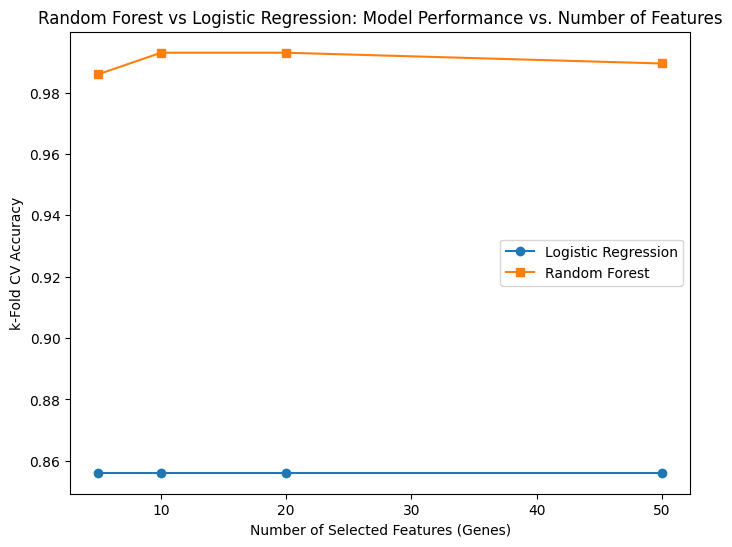

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes across datasets
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])

# Define different feature set sizes for comparison
feature_sizes = [5, 10, 20, 50]
results = []

for n in feature_sizes:
    selected_genes = list(common_genes)[:n]

    # =============================
    # 2. Preprocess Data & Transpose
    # =============================
    def preprocess_df(df, label):
        df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
        df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
        df_transposed['label'] = label
        return df_transposed

    df_all_transposed = preprocess_df(df_all, label=0)
    df_aml_transposed = preprocess_df(df_aml, label=1)
    df_cll_transposed = preprocess_df(df_cll, label=1)

    # Combine the datasets
    df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

    # Separate features and labels
    X = df_combined.drop(columns=['label'])
    y = df_combined['label']

    # Fill missing values with mean imputation
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)

    # =============================
    # 3. Feature Selection & PCA
    # =============================
    selector = VarianceThreshold(threshold=0.1)
    X_selected = selector.fit_transform(X_imputed)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X_scaled)

    # =============================
    # 4. Train & Evaluate Models using k-Fold Cross-Validation
    # =============================
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.001)
    cv_scores_lr = cross_val_score(lr, X_pca, y, cv=cv)

    # Random Forest
    rf = RandomForestClassifier(
        n_estimators=10, max_depth=3, min_samples_split=40, min_samples_leaf=20, random_state=42
    )
    cv_scores_rf = cross_val_score(rf, X_pca, y, cv=cv)

    # Store results
    results.append([n, cv_scores_lr.mean(), cv_scores_rf.mean()])

# Convert results into DataFrame and display
results_df = pd.DataFrame(results, columns=["Number of Features", "Logistic Regression", "Random Forest"])

# =============================
# 5. Plot the results
# =============================
plt.figure(figsize=(8, 6))
plt.plot(results_df["Number of Features"], results_df["Logistic Regression"], marker='o', label="Logistic Regression")
plt.plot(results_df["Number of Features"], results_df["Random Forest"], marker='s', label="Random Forest")

plt.xlabel("Number of Selected Features (Genes)")
plt.ylabel("k-Fold CV Accuracy")
plt.title("Random Forest vs Logistic Regression: Model Performance vs. Number of Features")
plt.legend()
plt.show()


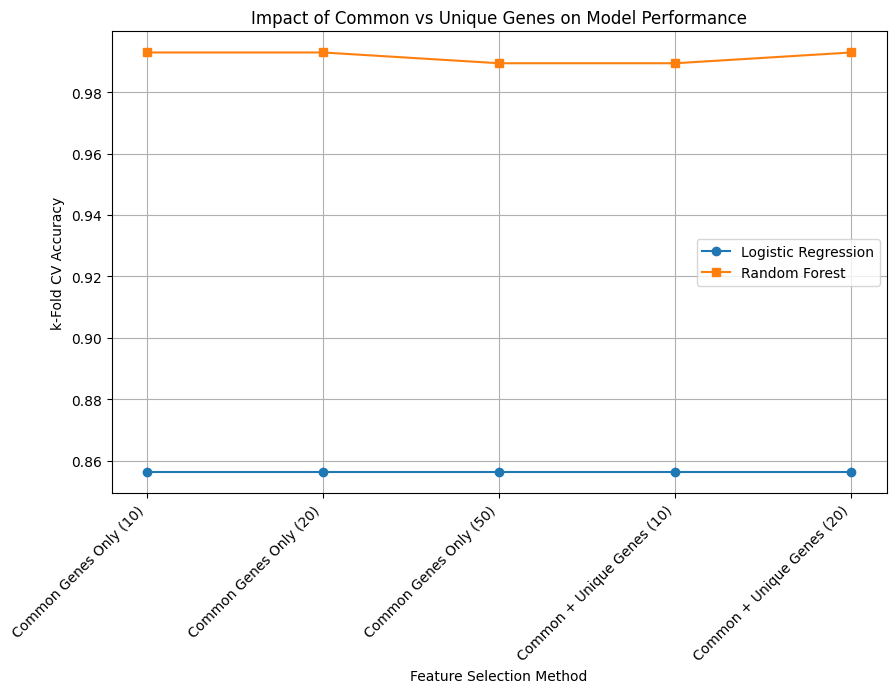


Impact of Unique Genes on Model Performance:
               Feature Set  Logistic Regression  Random Forest
    Common Genes Only (10)              0.85614       0.992982
    Common Genes Only (20)              0.85614       0.992982
    Common Genes Only (50)              0.85614       0.989474
Common + Unique Genes (10)              0.85614       0.989474
Common + Unique Genes (20)              0.85614       0.992982


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common and unique genes
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Define feature sets with and without unique genes for comparison
feature_sets = {
    "Common Genes Only (10)": list(common_genes)[:10],
    "Common Genes Only (20)": list(common_genes)[:20],
    "Common Genes Only (50)": list(common_genes)[:50],
    "Common + Unique Genes (10)": list(common_genes)[:7] + list(unique_all)[:1] + list(unique_aml)[:1] + list(unique_cll)[:1],
    "Common + Unique Genes (20)": list(common_genes)[:14] + list(unique_all)[:2] + list(unique_aml)[:2] + list(unique_cll)[:2],
}

# Store results
results = []

for label, selected_genes in feature_sets.items():
    # =============================
    # 2. Preprocess Data & Transpose
    # =============================
    def preprocess_df(df, label):
        df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
        df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
        df_transposed['label'] = label
        return df_transposed

    df_all_transposed = preprocess_df(df_all, label=0)
    df_aml_transposed = preprocess_df(df_aml, label=1)
    df_cll_transposed = preprocess_df(df_cll, label=1)

    # Combine the datasets
    df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

    # Separate features and labels
    X = df_combined.drop(columns=['label'])
    y = df_combined['label']

    # Fill missing values with mean imputation
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)

    # =============================
    # 3. Feature Selection & PCA
    # =============================
    selector = VarianceThreshold(threshold=0.1)
    X_selected = selector.fit_transform(X_imputed)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X_scaled)

    # =============================
    # 4. Train & Evaluate Models using k-Fold Cross-Validation
    # =============================
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.001)
    cv_scores_lr = cross_val_score(lr, X_pca, y, cv=cv)

    # Random Forest
    rf = RandomForestClassifier(
        n_estimators=10, max_depth=3, min_samples_split=40, min_samples_leaf=20, random_state=42
    )
    cv_scores_rf = cross_val_score(rf, X_pca, y, cv=cv)

    # Store results
    results.append([label, cv_scores_lr.mean(), cv_scores_rf.mean()])

# Convert results into DataFrame and display
results_df = pd.DataFrame(results, columns=["Feature Set", "Logistic Regression", "Random Forest"])

# =============================
# 5. Plot the Results
# =============================
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha="right")
plt.plot(results_df["Feature Set"], results_df["Logistic Regression"], marker='o', label="Logistic Regression")
plt.plot(results_df["Feature Set"], results_df["Random Forest"], marker='s', label="Random Forest")

plt.xlabel("Feature Selection Method")
plt.ylabel("k-Fold CV Accuracy")
plt.title("Impact of Common vs Unique Genes on Model Performance")
plt.legend()
plt.grid()
plt.show()

# Print the results
print("\nImpact of Unique Genes on Model Performance:")
print(results_df.to_string(index=False))


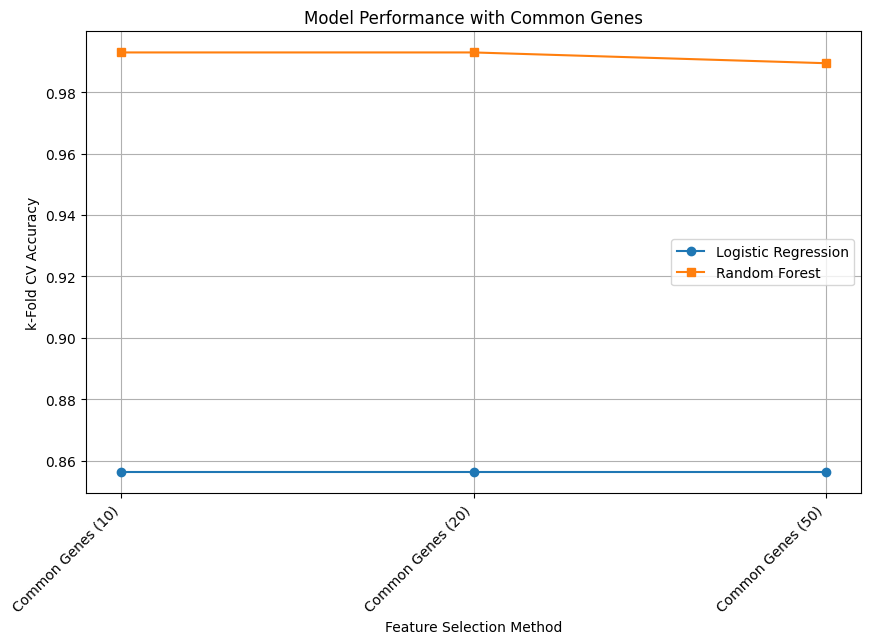


Final Model Performance:
      Feature Set  Logistic Regression  Random Forest
Common Genes (10)              0.85614       0.992982
Common Genes (20)              0.85614       0.992982
Common Genes (50)              0.85614       0.989474


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common and unique genes
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])
unique_all = set(df_all.iloc[:, 0]) - common_genes
unique_aml = set(df_aml.iloc[:, 0]) - common_genes
unique_cll = set(df_cll.iloc[:, 0]) - common_genes

# Define final feature sets for model comparison
feature_sets = {
    "Common Genes (10)": list(common_genes)[:10],
    "Common Genes (20)": list(common_genes)[:20],
    "Common Genes (50)": list(common_genes)[:50],
}

# Store results
results = []

for label, selected_genes in feature_sets.items():
    # =============================
    # 2. Preprocess Data & Transpose
    # =============================
    def preprocess_df(df, label):
        df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
        df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
        df_transposed['label'] = label
        return df_transposed

    df_all_transposed = preprocess_df(df_all, label=0)
    df_aml_transposed = preprocess_df(df_aml, label=1)
    df_cll_transposed = preprocess_df(df_cll, label=1)

    # Combine the datasets
    df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

    # Separate features and labels
    X = df_combined.drop(columns=['label'])
    y = df_combined['label']

    # Fill missing values with mean imputation
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)

    # =============================
    # 3. Feature Selection & PCA
    # =============================
    selector = VarianceThreshold(threshold=0.1)
    X_selected = selector.fit_transform(X_imputed)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X_scaled)

    # =============================
    # 4. Train & Evaluate Models using k-Fold Cross-Validation
    # =============================
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.001)
    cv_scores_lr = cross_val_score(lr, X_pca, y, cv=cv)

    # Random Forest
    rf = RandomForestClassifier(
        n_estimators=10, max_depth=3, min_samples_split=40, min_samples_leaf=20, random_state=42
    )
    cv_scores_rf = cross_val_score(rf, X_pca, y, cv=cv)

    # Store results
    results.append([label, cv_scores_lr.mean(), cv_scores_rf.mean()])

# Convert results into DataFrame and display
results_df = pd.DataFrame(results, columns=["Feature Set", "Logistic Regression", "Random Forest"])

# =============================
# 5. Plot the Results
# =============================
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha="right")
plt.plot(results_df["Feature Set"], results_df["Logistic Regression"], marker='o', label="Logistic Regression")
plt.plot(results_df["Feature Set"], results_df["Random Forest"], marker='s', label="Random Forest")

plt.xlabel("Feature Selection Method")
plt.ylabel("k-Fold CV Accuracy")
plt.title("Model Performance with Common Genes")
plt.legend()
plt.grid()
plt.show()

# Print the results
print("\nFinal Model Performance:")
print(results_df.to_string(index=False))



Random Forest k-Fold CV Accuracy: 1.0000
Logistic Regression k-Fold CV Accuracy: 0.8561
SVM k-Fold CV Accuracy: 0.9965


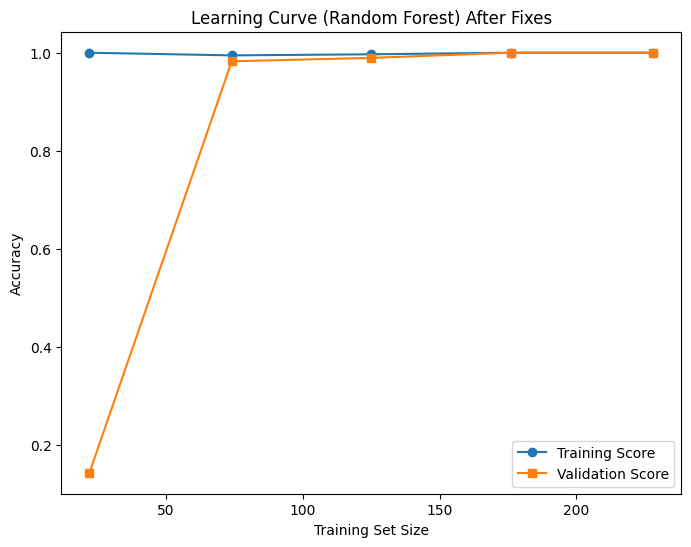

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# =============================
# 1. Load Data
# =============================
df_all = pd.read_csv('gene_expression_all_patients.csv')
df_aml = pd.read_csv('gene_expression_aml_patients.csv')
df_cll = pd.read_csv('gene_expression_cll_patients.csv')

# Identify common genes across datasets
common_genes = set(df_all.iloc[:, 0]) & set(df_aml.iloc[:, 0]) & set(df_cll.iloc[:, 0])


# Select common genes
selected_genes = list(common_genes)

# =============================
# 2. Preprocess Data & Transpose
# =============================
def preprocess_df(df, label):
    df_filtered = df[df.iloc[:, 0].isin(selected_genes)]
    df_transposed = df_filtered.set_index(df_filtered.columns[0]).T
    df_transposed['label'] = label
    return df_transposed

df_all_transposed = preprocess_df(df_all, label=0)
df_aml_transposed = preprocess_df(df_aml, label=1)
df_cll_transposed = preprocess_df(df_cll, label=1)

# Combine the datasets
df_combined = pd.concat([df_all_transposed, df_aml_transposed, df_cll_transposed])

# Store original indices for checking overlap
df_combined["sample_id"] = df_combined.index

# Separate features and labels
X = df_combined.drop(columns=['label', 'sample_id'])
y = df_combined['label']

# Fill missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# =============================
# 3. Feature Selection
# =============================
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_imputed)

# Get updated selected genes after feature selection
updated_selected_genes = X.columns[selector.get_support()]
joblib.dump(list(updated_selected_genes), "selected_genes.pkl")

# Train a temporary RF model to get feature importance
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_selected, y)

importances = rf_temp.feature_importances_
top_n = 10 # Keep only top 10 genes
top_genes_indices = np.argsort(importances)[-top_n:]
X_selected = X_selected[:, top_genes_indices]  # Select only top genes

# =============================
# 4. Apply Standardization & PCA (Reduce Dimensionality)
# =============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)  # Standardize before PCA

pca = PCA(n_components=1)  # Further reduce to 1 component
X_pca = pca.fit_transform(X_scaled)

# =============================
# 5. Train & Evaluate Models using k-Fold Cross-Validation
# =============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Model (Increased min_samples_split & min_samples_leaf)
rf = RandomForestClassifier(
    n_estimators=10,  # Reduce number of trees
    max_depth=3,      # Reduce tree depth
    min_samples_split=40,  # Require at least 40 samples per split (force broader patterns)
    min_samples_leaf=20,   # Require at least 20 samples per leaf
    random_state=42
)
cv_scores_rf = cross_val_score(rf, X_pca, y, cv=cv)
rf.fit(X_pca, y)

# Logistic Regression Model (Stronger Regularization)
lr = LogisticRegression(max_iter=1000, penalty="l2", C=0.001)  # Increased regularization
cv_scores_lr = cross_val_score(lr, X_pca, y, cv=cv)
lr.fit(X_pca, y)



print(f"\nRandom Forest k-Fold CV Accuracy: {cv_scores_rf.mean():.4f}")
print(f"Logistic Regression k-Fold CV Accuracy: {cv_scores_lr.mean():.4f}")

# =============================
# 6. Learning Curve Analysis
# =============================
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_pca, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest) After Fixes")
plt.legend()
plt.show()
